In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
plt.rcParams['lines.linewidth'] = 3
pi=np.pi


# ME 3263 - Sensors and Data Analysis

## Lab #5 -  Simple Harmonic Oscillator                                                                        
### What are simple harmonic oscillators?

In classical mechanics, a harmonic oscillator is a system that, when displaced from its equilibrium
position, experiences a restoring force proportional to the displacement. If restoring force  is the
only force acting on the system, the system is called a simple harmonic oscillator, and it undergoes
simple harmonic motion: sinusoidal oscillations about the equilibrium point, with a constant
amplitude and a constant frequency (which does not depend on the
amplitude).[\[1\]](https://en.wikipedia.org/wiki/Harmonic_oscillator)

Harmonic oscillators occur widely in nature and are exploited in many manmade devices, such as
clocks and radio circuits. They are the source of virtually all sinusoidal vibrations and waves. In
this lab, we will build spring-mass simple harmonic oscillator using common materials, and
determine the stiffness of the spring based on governing equations of the system.


### 1-DOF spring-mass system 

Figure 1 shows the schematic of spring-mass simple harmonic oscillator.  In this system with 1 mass
and 1 spring, we have 1 degree of freedom.  So, there is 1 differential equation that describes the
motion of mass.  Employing Newton's law, $ F = ma = m \ddot{x}$ and Hook's law for spring restoring
force , $F = -kx$, to this sytem, the governing differential is obtained as:  

$m \ddot{x} = -kx$    (1)

where  $m$ and $k$ denote the mass and spring stiffness respectively. The differential equations
relate acceleration of mass $\ddot{x}$ to displacement, $x$. 


<center><img src="./spring_mass_animation.gif" alt="Drawing" style="width: 100px;"/></center>
<center>Figure 1: Simple harmonic spring-mass oscillator</center>


                              

The solution for ${x}$ will be a combination of sine and cosine functions, at
natural frequency of the system, depending upon initial conditions. Substituting

${x}=A\sin(\omega t) + B \cos(\omega t)$    (2)

Eqn 1 gives

$m  \omega^2 = k$    (3)

where $A$ is amplitude of the sine function, $B$ is the amplitude of the cosine function, and
$\omega$ is the natural frequency. Eqn 3 can also be rearranged as 

$\omega^2 = k \frac{1}{m} $    (4)


## Lab procedure

This Lab requires simple materials to explore the physics of periodic motion. You need a spring and some weights, such as small fishing sinkers. A example is shown in Figure 2 which uses spring removed from spiral notebook. The spring has much smaller mass than added masses, and can be neglected. 

<center><img src="./spring_mass_smartphone.jpg" alt="Drawing" style="width: 300px;"/></center>
<center>Figure 2: Simple harmonic spring-mass oscillator using smartphone</center>

When a spring is displaced from its equilibrium position, it experiences a restoring force proportional to the displacement from equilibrium and the spring constant. When you add a weight to a spring and stretch it, then release it, the spring will oscillate before it returns to rest at its equilibrium position as shown in Figure 1. As you add more weight to the spring, the frequncy of oscillation, $\omega$,  changes. With increase in added mass, $\omega$ decreases as suggested by Eqn 4. In this lab, we will measure the frequncy of oscillation, $\omega$, by adding different masses, $m$ , to the spring, and fit the data using linear regression to determine the spring constant, $k$. 

The lab procedure is briefly described below:

1. Download the phyphox app and have your spring experiment ready to measure  $\omega$
2. Build your spring mass oscillator similar to example in Figure 2. Initially, in this syestem added mass is mass of the smartphone,$m_p$. You can check your phone specification for the mass or weigh the phone using the scale.
3. Verify the smartphone measurements of $\omega$ by comparing with alternative method. Example is provided in verification section below. Afer the verfication, proceed to the next phase of adding masses.

4. Measure the mass of one of your weights, using the scale. If your scale does not measure small weights, you can weigh all five of your weights and divide by five. Then measure the mass of the spring.
5. Perform the following steps to collect your data:
    - Add additional mass, $m_i$ , to the spring. Total mass is ($m_p$ + $m_i$)
    - Start the "timed run" spring experiment 
    - Hold one end of the spring in your hand and let it bounce gently down and then back up. 
    - Note the  $\omega$ once the run is over.
    - Perform at least three trials for each weight.
    - Repeat previous 5 steps for a series of different weights (at the least 5).

Once you have the data, use linear least square regression to obtain siffness constant , $k$ , of the spring. Also, perform error progation in $k$ based on your lab set-up and measuring equipment. Refer to next few sections for details.  


### Verification
    
For the verification of frequency given by smartphone, we will compare the observed frequency with altenative method. This method is  estimating frequency from the decaying oscillation[4]. The time between the peaks is the oscillation period, relate this to the frequency as 

$\omega=\frac{1}{T}~Hz$  (5)
 

In [2]:
%matplotlib notebook


<IPython.core.display.Javascript object>


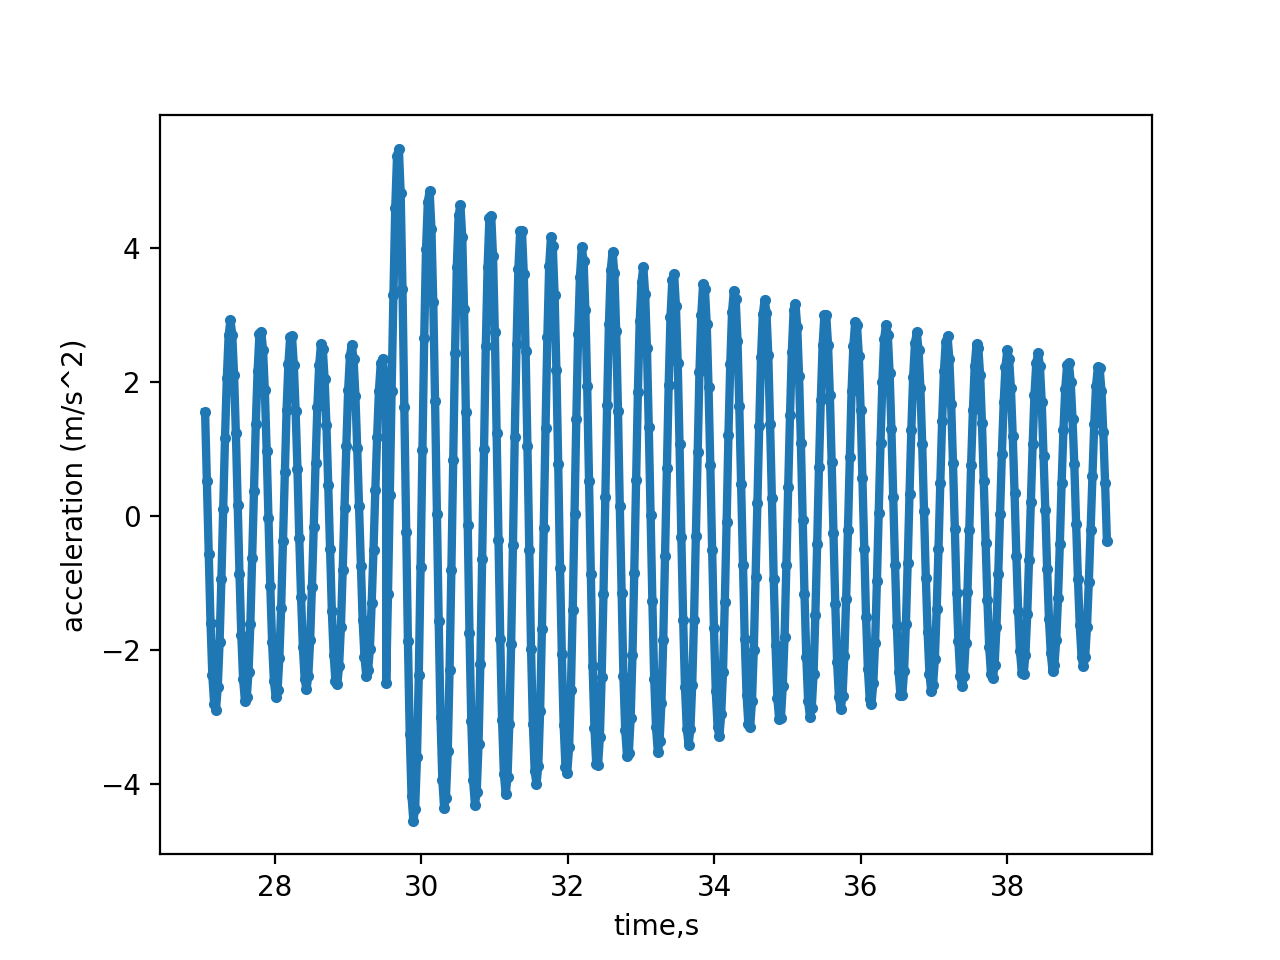

In [3]:
import pandas as pd

data = pd.read_csv('Raw Data.csv')
acc = data['Acceleration y (m/s^2)'].values  # Be careful with the directions
time = data['Time (s)'].values

plt.figure(3)
plt.plot(time, acc,'.-')
plt.xlabel('time (s)')

plt.xlabel('time,s')
plt.ylabel('acceleration (m/s^2)');

In the graph above, I zoomed into the region around t=30s. The natural frequency is obtined by counting the cycles and dividing by the time, 

$\omega = \frac{\#~cycles}{\Delta t}$    (6)



In [4]:
# Verification of frequency of oscillation
omega_smartphone  = 2.39
t1 = 33.4313;
t2 = 35.1133
delta_t =(t2-t1)

ncycles = 4;
omega0 = ncycles/delta_t

print("\nThe frequncy of oscillation: %1.2f Hz" % omega0)
print("\nThe frequncy reported by smartphone: %1.2f Hz" % omega_smartphone)


The frequncy of oscillation: 2.38 Hz

The frequncy reported by smartphone: 2.39 Hz


### Linear least square fit

Once you have number of data points for $m$ and $\omega$, you can use a linear regression to
determine the slope of the data. Equation (4) predicts that the square of frequency of
oscillation , $\omega^2$, and inverse of mass, $1/m$, are related by a proportional constant, $k$,
the stiffness constant of the spring. If we know $k$, the total squared error is as such

$SSE=\sum_i^N{(\omega_i^2-k\frac{1}{m_i})^2}$ (7)

where SSE is the sum of squares error between the predicted moment and measured moment for the $i^{th}$ measurement with $N$ total measurements [\[2\]](https://www.amazon.com/Numerical-Methods-Engineers-Steven-Chapra/dp/0073401064). We can choose a of $k$ that minimizes $SSE$, but it will never be zero. Below is an example calculation for a linear least squares regression for spring-mass simple harmonic oscillatorr.


In [5]:
# Data collected from Phyphox

phone_mass = 430  #in grams
added_mass = np.array([phone_mass, phone_mass+50, phone_mass+100, phone_mass+150, phone_mass+200])   #in grams
added_mass = np.array([0,0,0,50,50,50,60,60,60,100,100,100,150,150,150,200,200,200])
mass= (phone_mass/1000)+(added_mass/1000)           # mass in kg
#print(mass)
omega = np.array([2.39,2.41,2.39,2.13,2.12,2.13,2.08,2.08,2.07,2.03,2.03,2.05,1.94,1.93,1.92,1.81,1.82,1.81]) # in Hz


Best fit for stiffness constant is 2.22 +/- 0.03 N/m


<IPython.core.display.Javascript object>


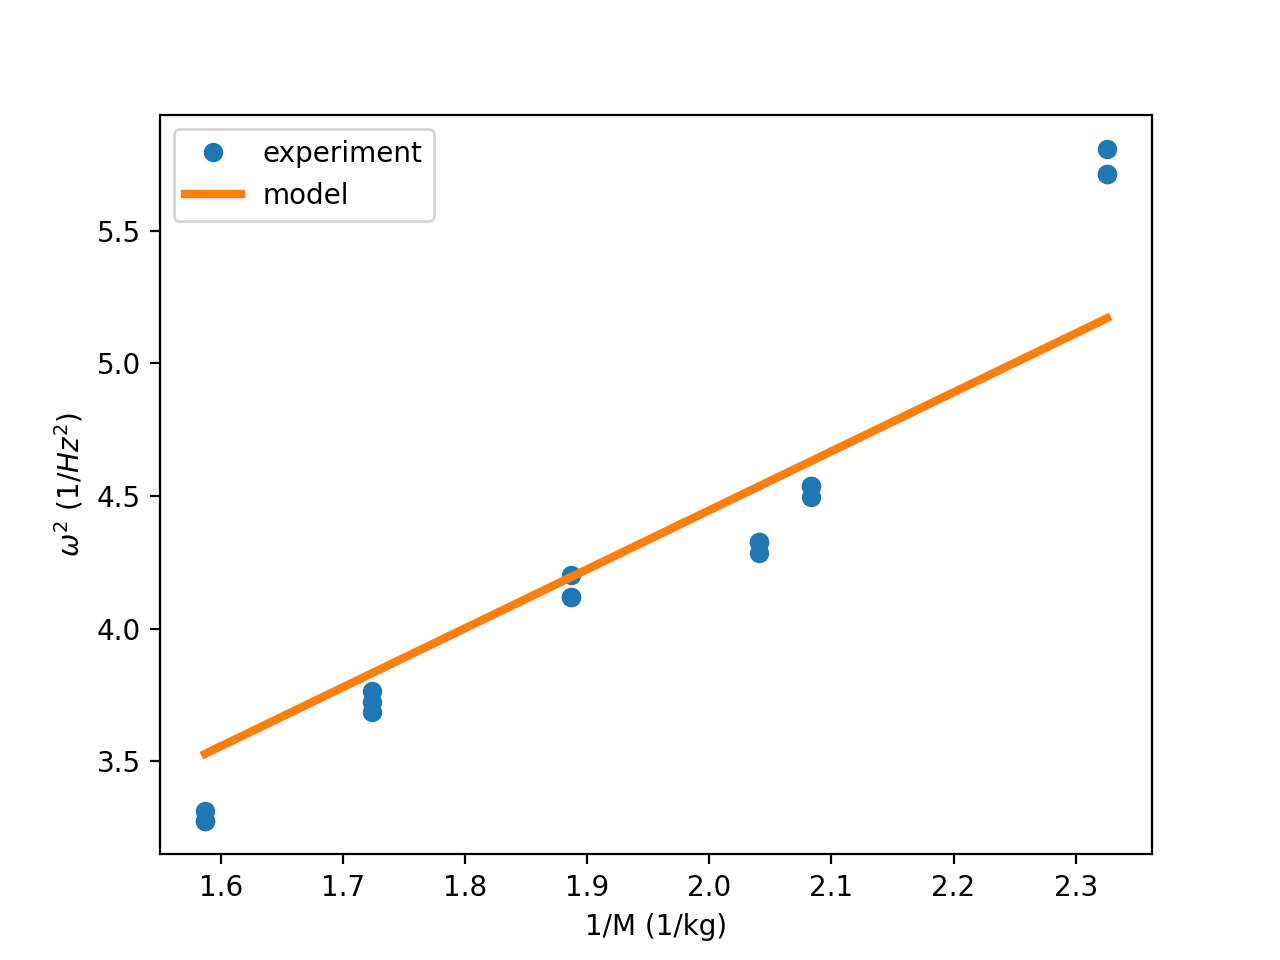

Text(0, 0.5, '$\\omega^2$ (1/$Hz^2$)')

In [6]:
# Linear least-square fit to determine stiffness of the springfrom scipy.optimize import curve_fit
from scipy.optimize import curve_fit

def func(x,K):
    return K*x

K,pcov = curve_fit(func, 1/mass, omega**2)  #independent variable on x-axis,1/m, dependent variable on y-axis,omega^2
K_error =np.sqrt(pcov[0,0])

print("Best fit for stiffness constant is %1.2f +/- %1.2f N/m"%(K,K_error))

plt.figure(4)
plt.plot(1/mass,omega**2,'o',label='experiment')
plt.plot(1/mass,func(1/mass,K),label='model')
plt.legend()
plt.xlabel(r'1/M (1/kg)')
plt.ylabel(r'$\omega^2$ ($Hz^2$)')

### Error Propagation in stiffness constant, $k$

Eqn 4 can be rearranged as :

$k = \omega^2m$        (8)

The propagation of error in $\sigma_k$ from the variables $\omega$ and  $m$ with unceratinties  $\sigma_\omega$ and  $\sigma_m$ repectively can be calculates as:

$\sigma_k = \sqrt{(\frac{\partial{k}}{\partial \omega})^2\sigma_\omega^2 + (\frac{\partial{k}}{\partial m}^2)\sigma_m^2}$    (9)

Note : One way to account for $\sigma_\omega$ and  $\sigma_m$ is to use estimates based on least significant digit of measurements. 
Typically, the minimum uncertainty of a single measurement made with an instrument incorporating a digital readout is equal to the value of the least significant digit (least-count) of the display. [\[3\]](http://www.phys.lsu.edu/classes/phys2108/2108_measA.pdf)

For example, suppose you are sick and have a fever, and you take your temperature with a digital electronic thermometer. The display indicates reading of 101.4 F. The correct representation of the measurement, assuming that the least-counts of thermometer is 0.1 F, would be 101.4 ± 0.1 F 


### References

1. Wikipedia contributors. (2020, October 20). Harmonic oscillator. In Wikipedia, The Free Encyclopedia. Retrieved 05:31, November 9, 2020, from https://en.wikipedia.org/w/index.php?title=Harmonic_oscillator&oldid=984564166
2. S. Chapra, Numerical Methods for Engineers, ch. 14-15, 6th Edition, McGraw-Hill, 2009.
3. [Introduction to Measurement and Data Analysis Notes](http://www.phys.lsu.edu/classes/phys2108/2108_measA.pdf)
4. ME 3263 Lab 3 - Measuring Natural frequncies Jupyter notebook
5. Science Buddies Staff. (2020, June 23). Simple Harmonic Motion in a Spring-Mass System. Retrieved from https://www.sciencebuddies.org/science-fair-projects/project-ideas/Phys_p064/physics/simple-harmonic-motion-springs?utm_source=googlesciencejournallanding&utm_campaign=GSJ&utm_